In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline  

# load data and select all numerical features

In [76]:
data = pd.read_csv('../data/2018_04_14/listings.csv')

In [86]:
data.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [94]:
intfeatures = ['id', 'scrape_id','host_id','host_listings_count',
       'host_total_listings_count','zipcode','accommodates','guests_included','minimum_nights','maximum_nights',
               'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','calculated_host_listings_count']
floatfeatures = ['latitude','longitude','bathrooms','bedrooms', 'beds','review_scores_rating','reviews_per_month']
datefeatures = ['last_scraped','host_since','first_review', 'last_review']
percentfeatures =['host_response_rate']
pricefeatures = ['price', 'security_deposit', 'cleaning_fee','extra_people']
features = intfeatures.copy()
features.extend(floatfeatures)
features.extend(percentfeatures)
features.extend(['security_deposit', 'cleaning_fee','extra_people'])
features.append('price')

In [137]:
df = data[features].dropna().reset_index(drop=True)
df[intfeatures] = df[intfeatures].astype('int')
df[floatfeatures] = df[floatfeatures].astype('float')
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(x[0:-1]))
for x in pricefeatures:
    df[x] = df[x].apply(lambda x: x.replace('$','').replace(',','')).astype(float)
df.loc[df['maximum_nights']>2000,'maximum_nights']=2000

# Distribuiton of price in 2018

Skewness: 9.941394
Kurtosis: 259.066519


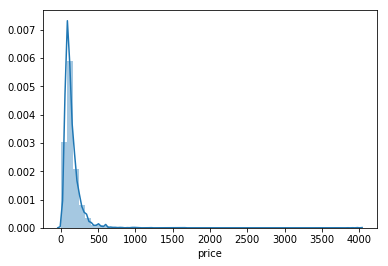

In [98]:
sns.distplot(df['price'])
print("""Skewness: %f
Kurtosis: %f""" % (df['price'].skew(),df['price'].kurt()))

# Correlation Between All numerical features

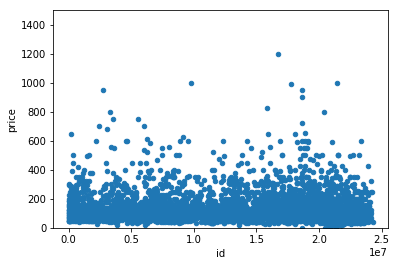

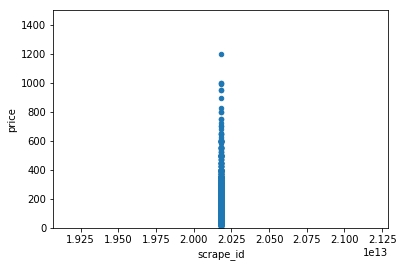

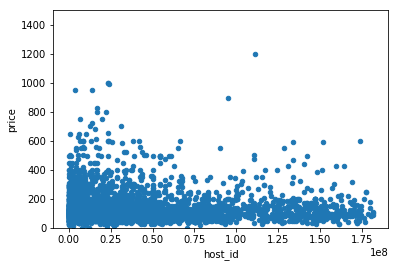

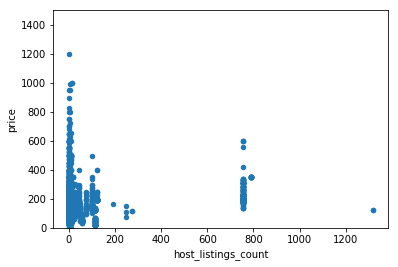

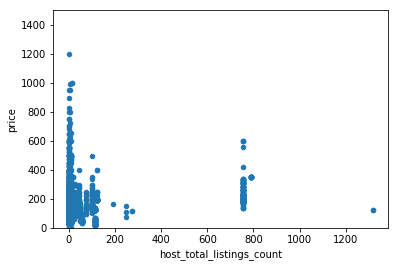

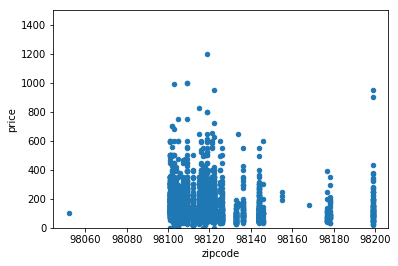

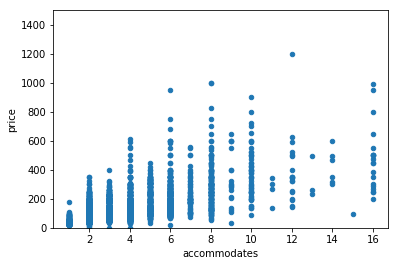

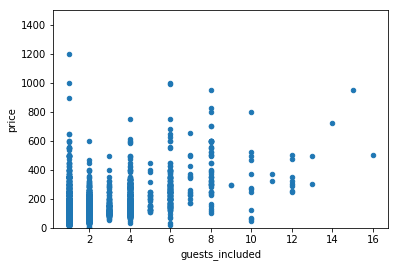

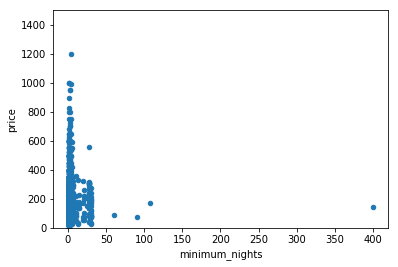

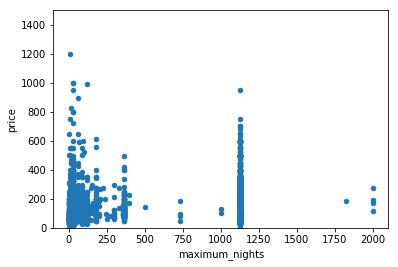

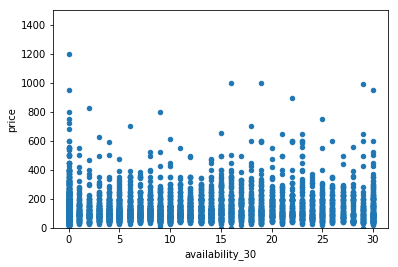

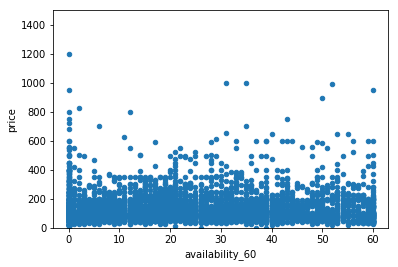

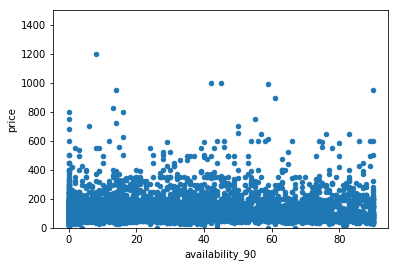

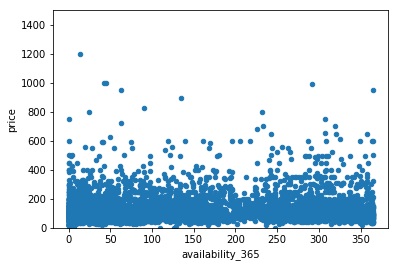

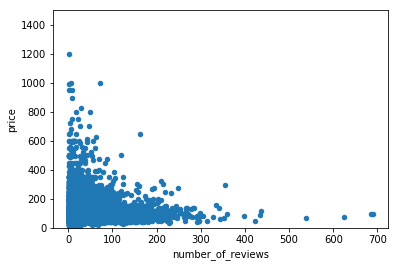

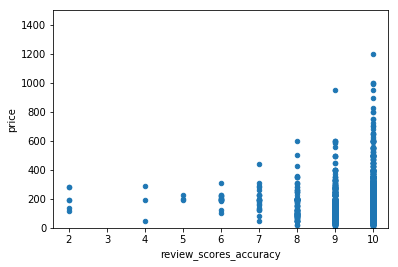

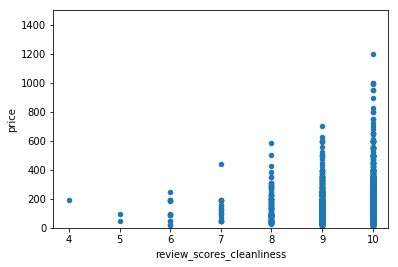

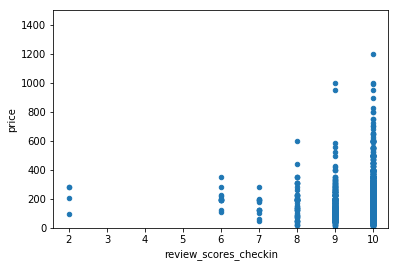

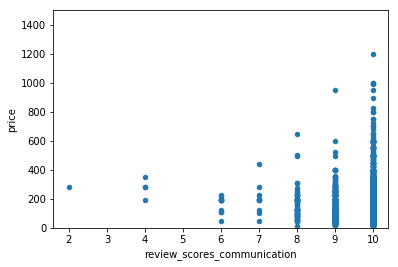

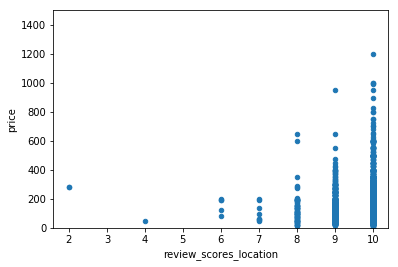

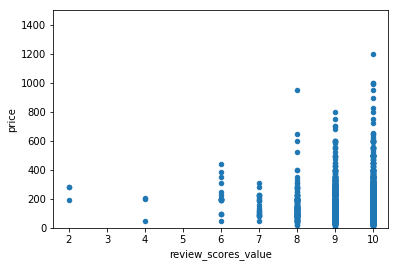

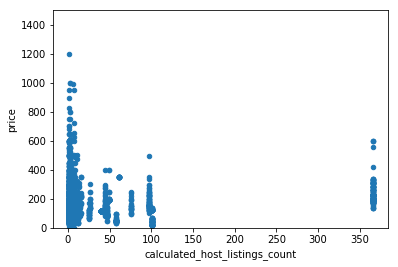

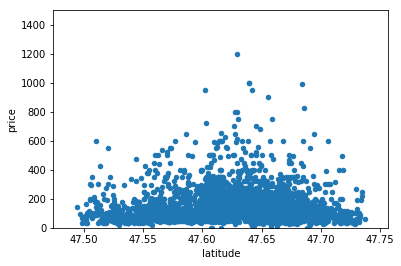

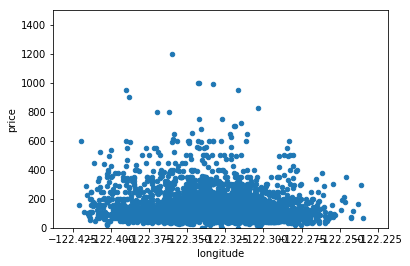

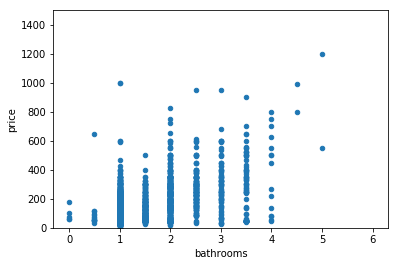

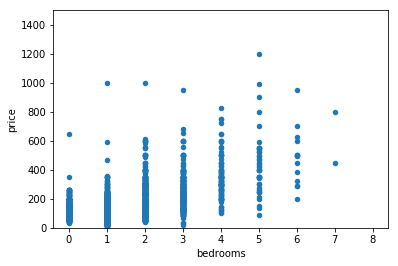

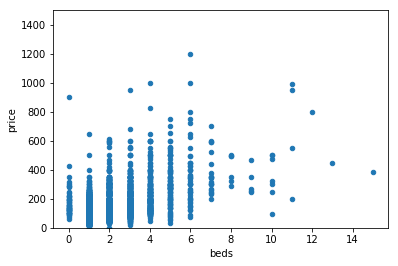

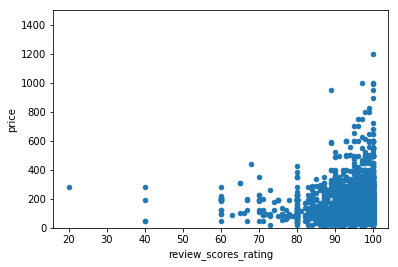

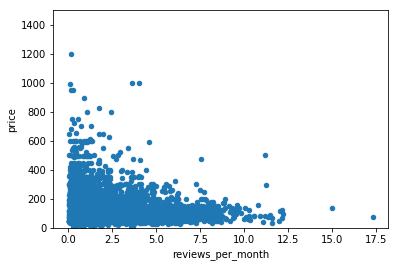

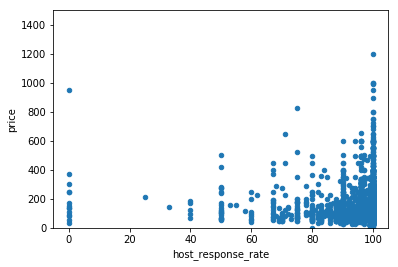

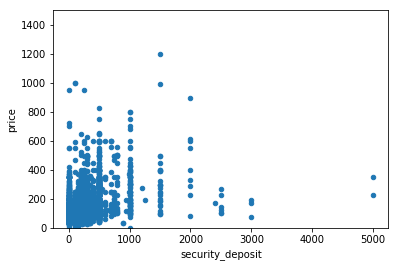

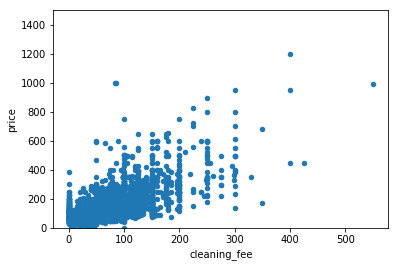

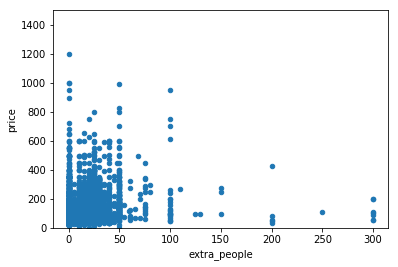

In [138]:
for f in features[0:-1]:
    df.plot.scatter(x=f,y='price',ylim=(0,1500))

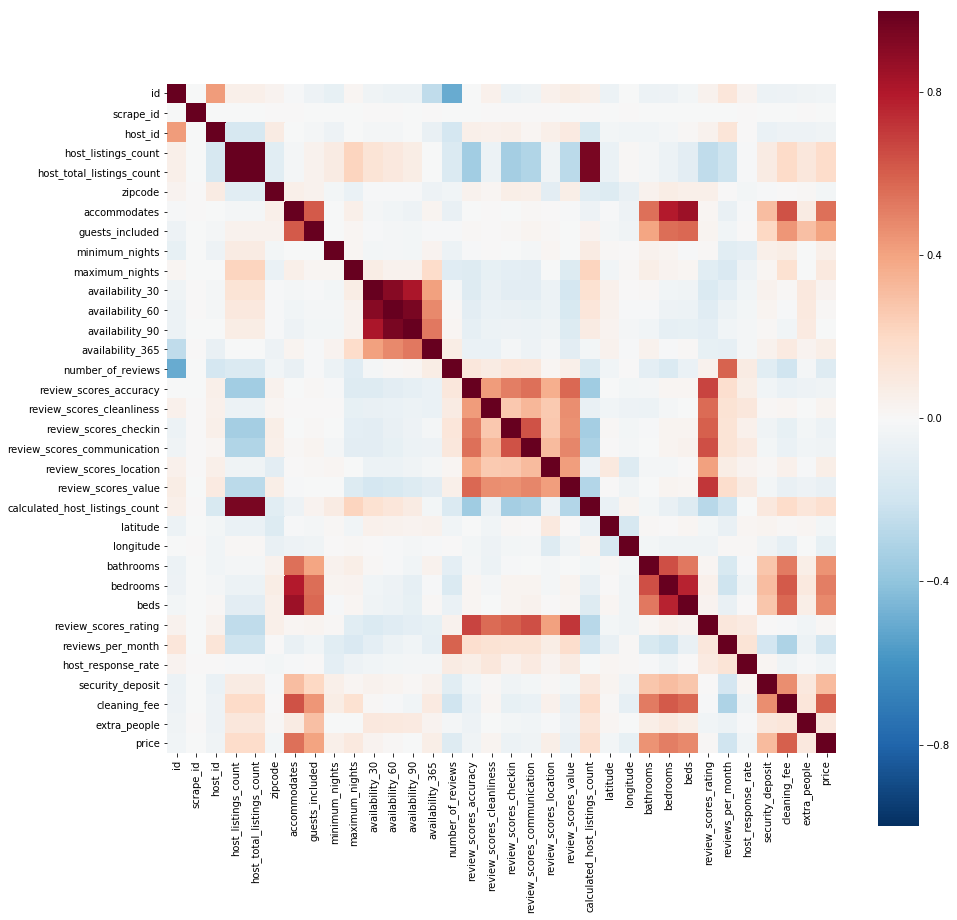

In [139]:
corrdf = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrdf,vmax=1,vmin=-1,square=True,cmap='RdBu_r')

# categorical features and price

In [109]:
catfeatures = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
                'neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type','room_type',
               'bed_type','calendar_updated','cancellation_policy','require_guest_profile_picture']
df2 = data[catfeatures]
df2['price'] = data['price'].apply(lambda x: x.replace('$','').replace(',','')).astype(float)
df2 = df2.dropna().reset_index(drop=True)

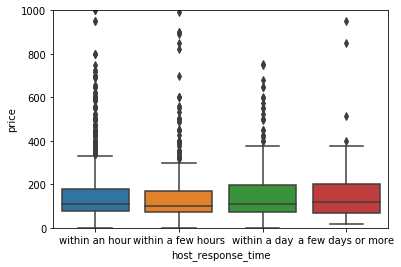

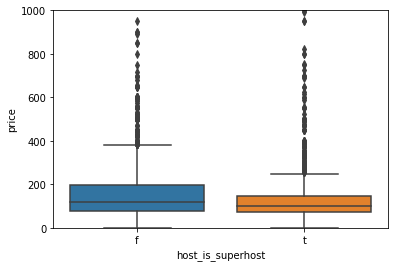

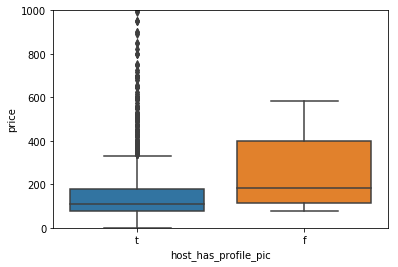

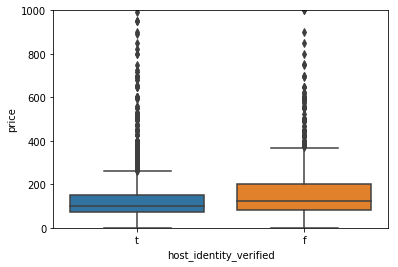

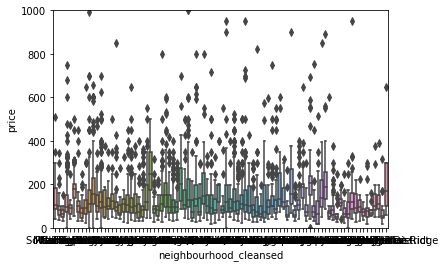

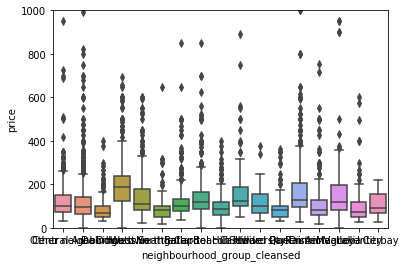

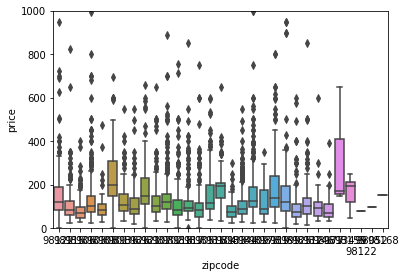

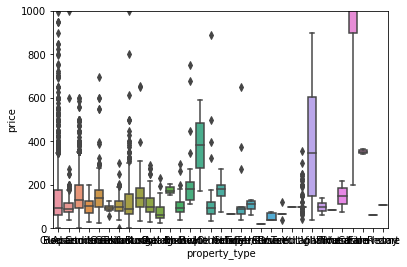

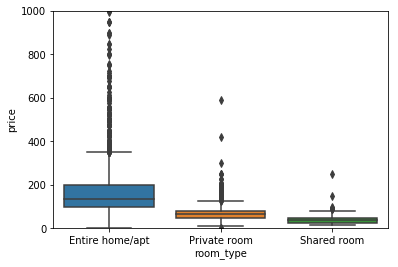

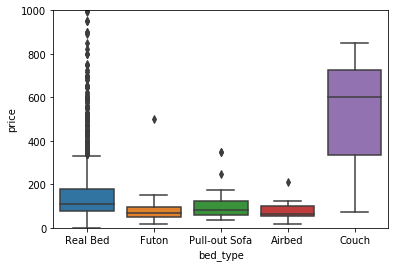

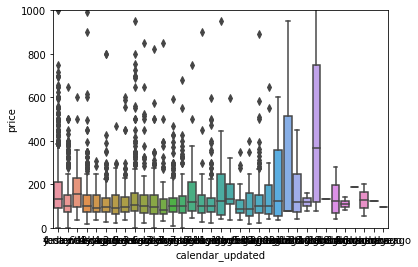

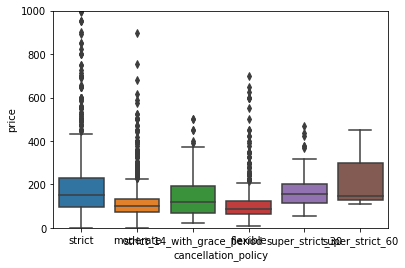

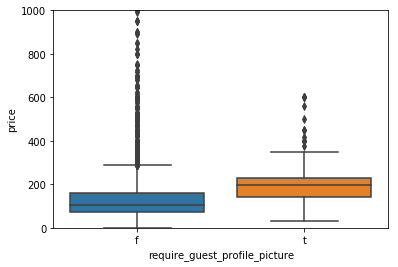

In [119]:
def myboxplot(mydata,feature,ymin=0,ymax=5000):
    fig = sns.boxplot(x=feature,y='price',data=mydata)
    fig.axis(ymin=0,ymax=1000)
    plt.show()
for x in catfeatures:
    myboxplot(df2,x)